<a href="https://colab.research.google.com/github/gabriellaburns/Deep-Learning-Homework/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from numpy import ceil


In [ ]:

#  Import and read the charity_data.csv.
import pandas as pd 
url= "https://raw.githubusercontent.com/gabriellaburns/Deep-Learning-Homework/main/Resources/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace
application_types_to_replace = list(counts[counts<10].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()
countsbinning

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count2=application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
class_count2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(countsbinning[countsbinning<50].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], axis="columns")
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
number_input_features = len(X_train_scaled[0])
number_input_features


57

## Compile, Train and Evaluate the Model

Attempt 1

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
hidden_nodes_layer1=80
hidden_nodes_layer2=60
hidden_nodes_layer3=40
hidden_nodes_layer4=20
hidden_nodes_layer5=10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation='tanh', input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer4, activation='tanh'))

#third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer4, activation='tanh'))

#third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer3, activation='tanh'))

#third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer4, activation='tanh'))

#third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer5, activation='tanh'))

#third hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 60)                3480      
                                                                 
 dense_8 (Dense)             (None, 20)                1220      
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 40)                840       
                                                                 
 dense_11 (Dense)            (None, 20)                820       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 80)               

In [ ]:
#Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=60, input_dim=number_input_features, activation='tanh'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=number_input_features, activation='tanh'))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=number_input_features, activation='tanh'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=40, input_dim=number_input_features, activation='tanh'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=7, input_dim=number_input_features, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=5, input_dim=number_input_features, activation='tanh'))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, input_dim=number_input_features, activation='relu'))
# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, input_dim=number_input_features, activation='tanh'))
# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, input_dim=number_input_features, activation='tanh'))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=2, activation='tanh'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3480      
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 40)                2040      
                                                                 
 dense_4 (Dense)             (None, 25)                1025      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [ ]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="Adagrad", metrics=["accuracy"])
# Adagrad

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=300) 


Epoch 1/300
684/684 [==============================] - 3s 3ms/step - loss: 0.2306 - accuracy: 0.6429 - val_loss: 0.2132 - val_accuracy: 0.7080
Epoch 2/300
684/684 [==============================] - 2s 3ms/step - loss: 0.2116 - accuracy: 0.6945 - val_loss: 0.2030 - val_accuracy: 0.7209
Epoch 3/300
684/684 [==============================] - 2s 3ms/step - loss: 0.2053 - accuracy: 0.7092 - val_loss: 0.1981 - val_accuracy: 0.7248
Epoch 4/300
684/684 [==============================] - 2s 3ms/step - loss: 0.2018 - accuracy: 0.7142 - val_loss: 0.1952 - val_accuracy: 0.7269
Epoch 5/300
684/684 [==============================] - 2s 3ms/step - loss: 0.1996 - accuracy: 0.7147 - val_loss: 0.1933 - val_accuracy: 0.7334
Epoch 6/300
684/684 [==============================] - 2s 3ms/step - loss: 0.1980 - accuracy: 0.7197 - val_loss: 0.1919 - val_accuracy: 0.7339
Epoch 7/300
684/684 [==============================] - 2s 3ms/step - loss: 0.1968 - accuracy: 0.7201 - val_loss: 0.1909 - val_accuracy: 0.7352

In [ ]:
#I also tried exploring different ways to change the inputs to the fit model, so I decided to add batch size and steps per epoch to the equation
#unfortunately, none were successful


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.1859 - accuracy: 0.7299 - 417ms/epoch - 2ms/step
Loss: 0.18591146171092987, Accuracy: 0.729912519454956


In [ ]:
#Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=number_input_features, activation='relu'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=number_input_features, activation='relu'))

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=number_input_features, activation='relu'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, input_dim=number_input_features, activation='relu'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, input_dim=number_input_features, activation='relu'))


# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, input_dim=number_input_features, activation='relu'))
# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, input_dim=number_input_features, activation='relu'))
# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, input_dim=number_input_features, activation='relu'))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=2, activation='tanh'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                4640      
                                                                 
 dense_16 (Dense)            (None, 50)                4050      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 25)                650       
                                                                 
 dense_21 (Dense)            (None, 25)               

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5910 - accuracy: 0.7308 - 403ms/epoch - 2ms/step
Loss: 0.5909647941589355, Accuracy: 0.7308454513549805


In [ ]:
#I'm exploring different ways to change the inputs to the fit model, so I decided to add batch size and steps per epoch to the equation
batch_size = 20
steps_per_epoch = int(np.ceil(X_train.shape[0]/batch_size) )
print(steps_per_epoch)
print(X_train.shape[0])

1287
25724


In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, steps_per_epoch=steps_per_epoch, batch_size=20) 


Epoch 1/100
1287/1287 [==============================] - 10s 6ms/step - loss: 0.5696 - accuracy: 0.7214
Epoch 2/100
1287/1287 [==============================] - 8s 6ms/step - loss: 0.5533 - accuracy: 0.7300
Epoch 3/100
1287/1287 [==============================] - 7s 5ms/step - loss: 0.5508 - accuracy: 0.7298
Epoch 4/100
1287/1287 [==============================] - 5s 4ms/step - loss: 0.5487 - accuracy: 0.7324
Epoch 5/100
1287/1287 [==============================] - 5s 4ms/step - loss: 0.5475 - accuracy: 0.7327
Epoch 6/100
1287/1287 [==============================] - 4s 3ms/step - loss: 0.5455 - accuracy: 0.7336
Epoch 7/100
1287/1287 [==============================] - 5s 4ms/step - loss: 0.5449 - accuracy: 0.7342
Epoch 8/100
1287/1287 [==============================] - 7s 6ms/step - loss: 0.5440 - accuracy: 0.7343
Epoch 9/100
1287/1287 [==============================] - 6s 5ms/step - loss: 0.5436 - accuracy: 0.7329
Epoch 10/100
1287/1287 [==============================] - 6s 4ms/step - 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5910 - accuracy: 0.7308 - 1s/epoch - 4ms/step
Loss: 0.5909647941589355, Accuracy: 0.7308454513549805


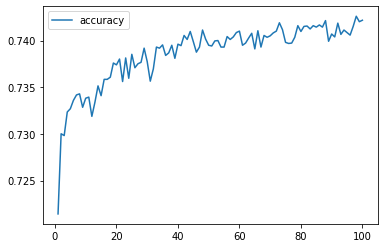

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
pip install keras_tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.0 MB/s 


In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def new_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=25,
        step=5), activation=activation, input_dim=57))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn

In [ ]:
import keras_tuner as kt

#I ued keras tunar to improve my model
tuner = kt.Hyperband(
    new_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
tuner.search(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test))


Trial 141 Complete [00h 01m 40s]
val_accuracy: 0.7358600497245789

Best val_accuracy So Far: 0.7358600497245789
Total elapsed time: 01h 06m 49s

Search: Running Trial #142

Value             |Best Value So Far |Hyperparameter
relu              |tanh              |activation
21                |21                |first_units
4                 |5                 |num_layers
21                |6                 |units_0
26                |6                 |units_1
6                 |26                |units_2
21                |26                |units_3
1                 |16                |units_4
50                |50                |tuner/epochs
17                |17                |tuner/initial_epoch
3                 |3                 |tuner/bracket
3                 |3                 |tuner/round
0137              |0136              |tuner/trial_id

Epoch 18/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5994 - accuracy: 0.6921 - val_loss: 0.5639 - val_accur

In [ ]:
# Export our model to HDF5 file
nn_model.save('AlphabetSoupCharity_Burns.h5')